# Principal Component Analysis
'''
Created on Mon 15 Jun 2020'''
Based on Tue 03 Mar 2020 version for pca analysis on neural activity.

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
import scipy
from sklearn.manifold import TSNE
cmap = cm.jet
from sklearn.decomposition import PCA

In [45]:
# define mouse information, and preprocessin versions from analysis.

mouse = 56165          ### mouse number id
decoding_v = 1            ## decoding version, normaly equal to one
motion_correction_v = 100 ### 100 means everything was aligned, 200 means it was also equalized
alignment_v = 1           ## alignment version
equalization_v = 0        ## equalization version
source_extraction_v = 1   ## source extraction version
component_evaluation_v = 1 ## component evaluation version
registration_v = 0        ## registration version
sf = 10                   ## sampling frequency of the original signal 
re_sf= 10                ## value of resampling

session_now = 1
period = 10

fixed = 'None'
## define task for plotting. This will cahnge for other mice!!!!
if mouse == 56165 or mouse == 32364:
    if mouse == 56165:
        sessions = [1,2,4]       ## sessions for this particular mouse
    if mouse == 32364:
        sessions = [1,2]
    if session_now == 1:
        task = 'OVERLAPPING'
        if mouse == 32364:
            fixed = 'LR'
        if mouse == 56165:
            fixed = 'UR'
    else:
        if session_now == 2:
            task = 'STABLE'
        else:
            task = 'RANDOM'
            
if mouse == 32365:
    sessions = [2,3] ## sessions for this particular mouse
    if session_now == 2:
        task = 'RANDOM'
    else:
        if session_now == 3:
            task = 'OVERLAPPING'
            fixed = 'LR'
            
if mouse == 56166:
    sessions = [1,2] ## sessions for this particular mouse
    if session_now == 1:
        task = 'RANDOM'
    else:
        if session_now == 2:
            task = 'OVERLAPPING'
            fixed = 'UL'
            
if mouse == 32366:
    sessions = [3,3] ## sessions for this particular mouse
    if session_now == 3:
        task = 'RANDOM'
            
if mouse == 32363:
    sessions = [1,2] ## sessions for this particular mouse
    if session_now == 1:
        task = 'RANDOM'
    else:
        if session_now == 2:
            task = 'OVERLAPPING'
            fixed = 'UL'

In [46]:
file_directory = os.environ['PROJECT_DIR'] + 'image_analysis/data/videos/'
timeline_file_dir = os.environ['PROJECT_DIR'] + 'neural_analysis/data/timeline/'
behaviour_dir = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/scoring_time_vector/'
objects_dir= os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/object_positions/'
figure_path = os.environ['PROJECT_DIR'] +'image_analysis/data/figures/PCA/'

In [47]:
# define all relevant files names
session = session_now
file_name_session_1 = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_trial_1_v' + f'{decoding_v}' + '.4.' + f'{100}' + \
                      '.' + f'{alignment_v}' + '.' + f'{equalization_v}' + '.' + f'{source_extraction_v}' + '.' + \
                      f'{component_evaluation_v}' + '.' + f'{registration_v}' + '.npy'
time_file_session_1 = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_trial_1_v' + f'{decoding_v}' + '.4.' + f'{1}' + \
                      '.' + f'{0}' + '.pkl'
beh_file_name_1 = 'mouse_' + f'{mouse}' + '_session_' + f'{session}' + '_event_' + f'{re_sf}' + '.npy'

In [48]:
##load activity and timeline
activity = np.load(file_directory + file_name_session_1)

timeline_file = open(timeline_file_dir + time_file_session_1, 'rb')
timeline_info = pickle.load(timeline_file)
##normalize neural activity
timeline_1 = np.zeros(len(timeline_info) + 1)
for i in range(len(timeline_info)):
    timeline_1[i] = timeline_info[i][1]
timeline_1[len(timeline_info)] = activity.shape[1]

## LOAD BEHAVIOUR
behaviour = np.load(behaviour_dir + beh_file_name_1)
#c = np.linspace(0, 20, len(behaviour))
reshape_behaviour = np.reshape(behaviour[:int(int(behaviour.shape[0]/re_sf)*re_sf)],(int(behaviour.shape[0]/re_sf),re_sf))
resample_beh1 = np.reshape(scipy.stats.mode(reshape_behaviour,axis=1)[0],reshape_behaviour.shape[0])
resample_timeline = timeline_1/re_sf

(1840, 3)


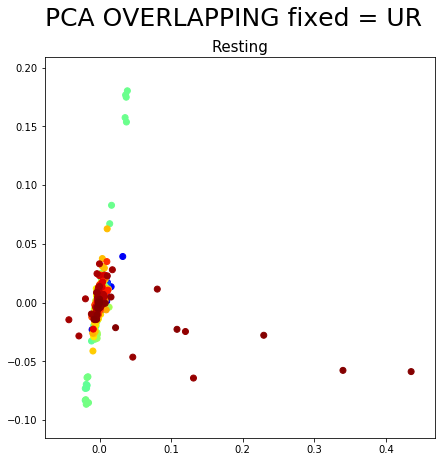

In [51]:
## run pca analysis on covariance matrix
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(activity.T)
reduced = pca.fit_transform(activity)
print(reduced.shape)

color1 = np.linspace(0, 20, reduced.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(reduced[:,0],reduced[:,1], c=color1, cmap=cmap)
ax.set_title('Resting', fontsize = 15)

fig.set_size_inches(7,7)

fig.suptitle('PCA ' + task + ' fixed = ' + fixed   , fontsize = 25)
figure_name = figure_path + 'tSNE_'+f'{mouse}'+'_session_'+f'{session}'+\
                             '_binsize_'+f'{re_sf}'+'_period_'+ f'{period}'  +'.png'
fig.savefig(figure_name)



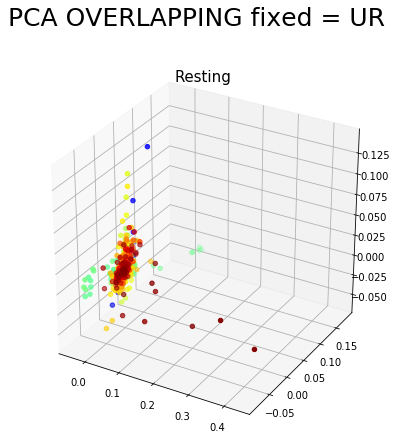

In [52]:
color1 = np.linspace(0, 20, reduced.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced[:,0],reduced[:,1],reduced[:,2], c=color1, cmap=cmap)
ax.set_title('Resting', fontsize = 15)

fig.set_size_inches(7,7)

fig.suptitle('PCA ' + task + ' fixed = ' + fixed   , fontsize = 25)
figure_name = figure_path + 'tSNE_'+f'{mouse}'+'_session_'+f'{session}'+\
                             '_binsize_'+f'{re_sf}'+'_period_'+ f'{period}'  +'_3D.png'
fig.savefig(figure_name)
